In [8]:
import numpy as np
from scipy import stats, ndimage
from scipy.stats import moment, skew, kurtosis
from scipy.stats import binned_statistic

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import matplotlib.ticker as mticker

In [2]:
## Data

Tskn_ud_284 = [3.999500000000001, 3.8579999999999988, 3.8426666666666645, 4.096666666666664, 1.2619999999999987, 1.0469999999999988, 2.2155000000000005, 1.9555000000000007, 1.9774999999999991]
Dist_ud_284 = [26.159589323044838,22.71853447276304,23.747821635867318,25.182542088268264,8.032025484010278,10.304973720945146,4.403095430780633,14.546349888933774,12.817242329270274]
Tgrd_ud_284 = [3.999500000000001/26.159589323044838, 3.8579999999999988/22.71853447276304, 3.8426666666666645/23.747821635867318, 4.096666666666664/25.182542088268264, 1.2619999999999987/8.032025484010278, 1.0469999999999988/10.304973720945146, 2.2155000000000005/4.403095430780633, 1.9555000000000007/14.546349888933774, 1.9774999999999991/12.817242329270274]


Tskn_ud_287 = [1.0004999999999988, 1.1319999999999997, 0.8615000000000013, 0.6965000000000003, 0.40149999999999864, 0.516, 1.4045000000000005, 1.4699999999999989, 2.014999999999999, 1.8575, 1.625, 1.7040000000000006, 1.8225000000000016, 1.6910000000000007, 1.6464999999999996, 1.6089999999999982, 1.4495000000000005, 1.6044999999999998]

Dist_ud_287 = [5.8500535461795,3.5860248592167694,5.397246664753277,6.267240241337363,7.34724018744119,4.88503660850077,6.921941671194186,10.686834624785078,12.294139734461433,6.912366570330001,8.190617685041586,7.234911023048076,11.865811740852982,5.909147636856523,10.167960357770168,8.38000972150763,11.121061671062746,7.628404691804947]

Tgrd_ud_287 = [1.0004999999999988/5.8500535461795, 1.1319999999999997/3.5860248592167694, 
               0.8615000000000013/5.397246664753277, 0.6965000000000003/6.267240241337363,
               0.40149999999999864/7.34724018744119, 0.516/4.88503660850077,
               1.4045000000000005/6.921941671194186, 1.4699999999999989/10.686834624785078, 
               2.014999999999999/12.294139734461433, 1.8575/6.912366570330001, 
               1.625/8.190617685041586, 1.7040000000000006/7.234911023048076,
               1.8225000000000016/11.865811740852982, 1.6910000000000007/5.909147636856523,
               1.6464999999999996/10.167960357770168, 1.6089999999999982/8.38000972150763, 
               1.4495000000000005/11.121061671062746, 1.6044999999999998/7.628404691804947]  


Tskn_ud_288 = [1.6870000000000012, 1.8854999999999986, 1.9969999999999999, 2.0795000000000012, 1.0580000000000016, 1.1425000000000018, 1.0619999999999976, 1.1729999999999983]
Dist_ud_288 = [8.092967437157945,8.142379157006712,10.381226738736254,10.945983421626146,7.227706474403554,2.6712188197022164,8.319066269097686,7.1882514044591534]
Tgrd_ud_288 = [0.20845258715045997, 0.23156622452019823, 0.19236647558697886, 0.1899783619159793, 0.14638115199432059, 0.4277073789587055, 0.12765855754087962, 0.16318294032848385]

Tskn_ud_289 = [2.883000000000001, 2.3820000000000014, 1.9450000000000038, 1.8569999999999993, 3.348499999999998, 3.2005000000000017, 1.8739999999999988, 1.227500000000001, 1.9440000000000008, 1.9800000000000004]
Dist_ud_289 = [6.659841035737301,4.853214038038545,6.052777200894161,15.660763196489931,29.23088956662723,12.385755490845488,17.388575109441813,9.704839733509647,12.768311894978188,12.927222471579]
Tgrd_ud_289 = [2.883000000000001/6.659841035737301, 2.3820000000000014/4.853214038038545, 1.9450000000000038/6.052777200894161, 1.8569999999999993/15.660763196489931, 3.348499999999998/29.23088956662723, 3.2005000000000017/12.385755490845488, 1.8739999999999988/17.388575109441813, 1.227500000000001/9.704839733509647, 1.9440000000000008/12.768311894978188, 1.9800000000000004/12.927222471579]

Tskn_ud_292 = [2.8125000000000018, 3.0415000000000028, 2.9265000000000008, 2.9704999999999995, 2.628999999999998, 3.097500000000002]
Dist_ud_292 = [17.152123835782692, 17.300515857433133, 20.66655058576392, 9.774982996134234, 10.522544046745168, 15.455266627680507]
Tgrd_ud_292 = [2.8125000000000018/17.152123835782692, 3.0415000000000028/17.300515857433133, 2.9265000000000008/20.66655058576392, 2.9704999999999995/9.774982996134234, 2.628999999999998/10.522544046745168, 3.097500000000002/15.455266627680507]

Tskn_ud_293 = [2.7310000000000016, 3.009000000000004, 3.4930000000000003, 3.711500000000001, 
               3.8809999999999967, 3.7764999999999986, 3.3999999999999986, 3.8505000000000003, 
               3.6905, 3.4620000000000015, 3.349499999999999, 3.3200000000000003]
Dist_ud_293 = [12.948890733517596, 11.173016867455706, 12.20551482793465, 11.503111878083013, 
               12.669771526541005, 16.384976680930187,10.363246172891554, 14.418955217121272,         
               13.766325444923691, 11.746102203622113, 14.265948828253684, 13.790635415109048]

Tgrd_ud_293 = [2.7310000000000016/12.948890733517596, 3.009000000000004/11.173016867455706, 3.4930000000000003/12.20551482793465, 3.711500000000001/11.503111878083013, 
               3.8809999999999967/12.669771526541005, 3.7764999999999986/16.384976680930187, 3.3999999999999986/10.363246172891554, 3.8505000000000003/14.418955217121272, 
               3.6905/13.766325444923691, 3.4620000000000015/11.746102203622113,3.349499999999999/14.265948828253684, 3.3200000000000003/13.790635415109048]

Tskn_ud_294 = [3.2459999999999987, 3.3735, 3.1935000000000002, 3.288499999999999, 3.433, 3.4430000000000014, 3.168000000000003, 2.8275000000000023, 3.2464999999999975, 3.993499999999999 ]
Dist_ud_294 = [16.347613830192174, 16.944689478298002, 13.274789865130096, 11.517068590311364, 17.2480486917251, 16.897622169821627, 9.498632149308081, 9.149633643757907, 15.24873802200254, 23.406188492598677]
Tgrd_ud_294 = [3.2459999999999987/16.347613830192174,3.3735/16.944689478298002,3.1935000000000002/13.274789865130096,3.288499999999999/11.517068590311364, 3.433/17.2480486917251, 3.4430000000000014/16.897622169821627, 3.168000000000003/9.498632149308081, 2.8275000000000023/9.149633643757907, 3.2464999999999975/15.24873802200254, 3.993499999999999/23.406188492598677 ]

Tskn_ud_295 = [4.803499999999998, 4.606999999999999, 4.769, 5.067499999999999, 3.794999999999998, 3.848499999999998, 4.415999999999997, 4.124499999999998, 3.4160000000000004]
Tgrd_ud_295 = [4.803499999999998/20.546104068358485, 4.606999999999999/21.755788226618865, 4.769/23.88185119586552, 5.067499999999999/24.783365682284952, 3.794999999999998/17.337232135464255, 3.848499999999998/18.212492163975025, 4.415999999999997/21.155330785030785, 4.124499999999998/10.510338643637429, 3.4160000000000004/15.300846746043634]
Dist_ud_295 = [20.546104068358485,21.755788226618865,23.88185119586552,24.783365682284952,17.337232135464255,18.212492163975025,21.155330785030785,10.510338643637429,15.300846746043634]

Tskn_ud_296 = [4.635, 4.007, 3.809000000000001, 2.8825000000000003, 2.919500000000003]
Dist_ud_296 = [21.793200915219582,22.86369144620514,13.21225420389939,7.491411995689703,5.362668974773839]
Tgrd_ud_296 = [4.635/21.793200915219582, 4.007/22.86369144620514, 3.809000000000001/13.21225420389939, 2.8825000000000003/7.491411995689703, 2.919500000000003/5.362668974773839]

Tskn_ud_297 = [3.9644999999999992, 0.14000000000000057, 1.581500000000002, 4.1480000000000015, 3.855500000000001, 3.4680000000000017]
Dist_ud_297 = [25.676763189673242,2.7652389627313534,21.390917707494634,30.39509208196145,24.52895181184179,28.014250948145246]
Tgrd_ud_297 = [3.9644999999999992/25.676763189673242, 0.14000000000000057/2.7652389627313534, 1.581500000000002/21.390917707494634, 4.1480000000000015/30.39509208196145, 3.855500000000001/24.52895181184179, 3.4680000000000017/28.014250948145246]

Tskn_ud_298_mod = [0.9365000000000023, 2.7354999999999983, 2.830499999999999, 1.0970000000000013, 1.0035000000000007, 3.4689999999999994, 1.7110000000000003]
Dist_ud_298_mod = [20.90817630281386,15.748258976854594,18.617899169372265,10.892892656046934,2.944011145843968,22.19101032035155,1.6100068857371677]
Tgrd_ud_298_mod = [0.9365000000000023/20.90817630281386, 2.7354999999999983/15.748258976854594, 2.830499999999999/18.617899169372265, 1.0970000000000013/10.892892656046934, 1.0035000000000007/2.944011145843968, 3.4689999999999994/22.19101032035155, 1.7110000000000003/1.6100068857371677]


flag_stab_284 = [-1,1,-1,1,-2,-2,-1,-1,1]
flag_stab_287 = [-2,-1,-2,-2,-2,-2,-1,1,-1,1,-1,1,-1,1,-1,1,-1,-1] 
flag_stab_288 = [-1,1,-1,1,2,2,2,2] 
flag_stab_289 = [-1,1,-1,1,-1,1,-1,-2,-2,1] 
flag_stab_292 = [-1,1,-1,1,-1,1]
flag_stab_293 = [-1,1,-1,1,-1,1,-1,1,-1,1,-1,1] 
flag_stab_294 = [-1,1,-1,1,-1,1,-1,1,-1,1]
flag_stab_295 = [-1,1,-1,1,-1,1,-1,1,-1]
flag_stab_296 = [1,-1,1,-1,1]
flag_stab_297 = [-1,2,2,-1,1,-1] 
flag_stab_298 = [-1,1,-1,1,-1,2,1,-2,1,-1,2]
flag_stab_298_mod = [2,1,1,2,1,-1,2] 


In [3]:
grad_arr = np.array([ 0.15288848577132327, 0.16981729189553602, 0.16181133265978914, 0.16267883727970295, 0.15712101542908696, 0.10160142357975568, 0.5031687445409764, 0.13443235003494997, 0.15428435767997098,
                     0.17102407560925598, 0.31566986968607963, 0.1596184227832364, 0.11113344521341895, 0.05464636921578962, 0.10562868640576302, 0.20290549483317066, 0.13755242329573916, 0.16389922707253737, 0.26872128106934606, 0.1983977353707664, 0.23552466568995947, 0.1535925261417463, 0.28616648354711927, 0.16193021432678725, 0.19200455052819754, 0.13033827550580285, 0.21033231256381615,
                     0.20845258715045997, 0.23156622452019823, 0.19236647558697886, 0.1899783619159793, 0.14638115199432059, 0.4277073789587055, 0.12765855754087962, 0.16318294032848385,
                     0.4328932153980201, 0.49080876741275986, 0.3213400948762287, 0.11857659660010766, 0.11455347578005168, 0.25840167782785173, 0.10777191277636294, 0.12648328398062986, 0.15225191990842432, 0.15316515240246753,
                     0.1639738627663459, 0.17580400636974233, 0.14160563408273416, 0.30388799665173427, 0.24984452318003836, 0.20041711829496067,                 
                     0.21090609660725118, 0.2693095370476431, 0.2861821110573397, 0.32265182146681165, 0.3063196516109202, 0.2304855279040656, 0.3280825277405651, 0.26704431368424403, 0.2680817052280909, 0.29473606988813994, 0.23478985101687178, 0.24074307673761006,
                     0.198561088714061, 0.1990889242509063, 0.24056877980333313, 0.2855327268578067, 0.19903700768464386, 0.20375647918966022, 0.33352170609436355, 0.3090287666248789, 0.2129028641790287, 0.1706172707813061,
                     0.23379128150127051, 0.21175973731731748, 0.19969138744259576, 0.20447182456829208, 0.21889307187836046, 0.21131100375227457, 0.20874171360746088, 0.39242313115161304, 0.22325561824761636,    
                     0.2126810108359568, 0.1752560390096181, 0.2882929696338899, 0.3847739253505868, 0.5444117497711347,
                     0.15440030235565103, 0.050628535865022, 0.07393324688664009, 0.13646940067872707, 0.15718160439854953, 0.12379413629225054,
                     0.044791089688389824, 0.1737017408730956, 0.15203111662868857, 0.10070786839077382, 0.3408614812537758, 0.15632456341199358, 1.0627283741190903
                    ])

dist_arr = np.array([26.159589323044838,22.71853447276304,23.747821635867318,25.182542088268264,8.032025484010278,10.304973720945146,4.403095430780633,14.546349888933774,12.817242329270274,
                     5.8500535461795,3.5860248592167694,5.397246664753277,6.267240241337363,7.34724018744119,4.88503660850077,6.921941671194186,10.686834624785078,12.294139734461433,6.912366570330001,8.190617685041586,7.234911023048076,11.865811740852982,5.909147636856523,10.167960357770168,8.38000972150763,11.121061671062746,7.628404691804947,
                     8.092967437157945,8.142379157006712,10.381226738736254,10.945983421626146,7.227706474403554,2.6712188197022164,8.319066269097686,7.1882514044591534,
                     6.659841035737301,4.853214038038545,6.052777200894161,15.660763196489931,29.23088956662723,12.385755490845488,17.388575109441813,9.704839733509647,12.768311894978188,12.927222471579,
                     17.152123835782692, 17.300515857433133, 20.66655058576392, 9.774982996134234, 10.522544046745168, 15.455266627680507,
                     12.948890733517596, 11.173016867455706, 12.20551482793465, 11.503111878083013, 12.669771526541005, 16.384976680930187,10.363246172891554, 14.418955217121272, 13.766325444923691, 11.746102203622113, 14.265948828253684, 13.790635415109048,                     
                     16.347613830192174, 16.944689478298002, 13.274789865130096, 11.517068590311364, 17.2480486917251, 16.897622169821627, 9.498632149308081, 9.149633643757907, 15.24873802200254, 23.406188492598677,                   
                     20.546104068358485, 21.755788226618865, 23.88185119586552, 24.783365682284952, 17.337232135464255, 18.212492163975025, 21.155330785030785,10.510338643637429,15.300846746043634,
                     21.793200915219582,22.86369144620514,13.21225420389939,7.491411995689703,5.362668974773839,
                     25.676763189673242,2.7652389627313534,21.390917707494634,30.39509208196145,24.52895181184179,28.014250948145246,
                     20.90817630281386,15.748258976854594,18.617899169372265,10.892892656046934,2.944011145843968,22.19101032035155,1.6100068857371677                 
                     ])


flag_stab2 = np.array([-1,1,-1,1,-2,-2,-1,-1,1,
                     -2,-1,-2,-2,-2,-2,-1,1,-1,1,-1,1,-1,1,-1,1,-1,-1,
                     -1,1,-1,1,2,2,2,2,
                     -1,1,-1,1,-1,1,-1,-2,-2,1,
                     -1,1,-1,1,-1,1,
                     -1,1,-1,1,-1,1,-1,1,-1,1,-1,1,
                     -1,1,-1,1,-1,1,-1,1,-1,1,
                     -1,1,-1,1,-1,1,-1,1,-1,
                     1,-1,1,-1,1,
                     -1,2,2,-1,1,-1,
                     2,1,1,2,1,-1,2
                     ])    

In [6]:
import matplotlib as mpl
from matplotlib.colors import ListedColormap


col_dict={-2:"c",
          -1:"blue",
          1:"red",
          2:"g"}

# We create a colormar from our list of colors
cm = ListedColormap([col_dict[x] for x in col_dict.keys()])

# Let's also define the description of each category : 
labels = np.array(["nn","np","pn","pp"])
len_lab = len(labels)

# prepare normalizer
## Prepare bins for the normalizer
norm_bins = np.sort([*col_dict.keys()]) + 0.5
norm_bins = np.insert(norm_bins, 0, np.min(norm_bins) - 1.0)
#print(norm_bins)
## Make normalizer and formatter
norm = mpl.colors.BoundaryNorm(norm_bins, len_lab, clip=True)
fmt = mpl.ticker.FuncFormatter(lambda x, pos: labels[norm(x)])

diff = norm_bins[1:] - norm_bins[:-1]
tickz = norm_bins[:-1] + diff / 2

# Plot our figure
#fig,ax = plt.subplots()
#im = ax.imshow(A, cmap=cm, norm=norm)

print(labels)

['nn' 'np' 'pn' 'pp']


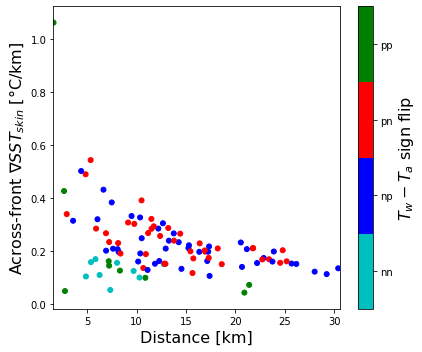

In [9]:
## Gradients by stability change sign

# plot gradient vs. distance color-coded by stability switch sign
fig = plt.figure(figsize=(6,5))
fig = plt.scatter(Dist_ud_298_mod, Tgrd_ud_298_mod, c=flag_stab_298_mod,cmap=cm,norm=norm, marker='o', s=25)
fig = plt.scatter(Dist_ud_297, Tgrd_ud_297, c=flag_stab_297,cmap=cm,norm=norm, marker='o', s=25)
fig = plt.scatter(Dist_ud_296, Tgrd_ud_296, c=flag_stab_296,cmap=cm,norm=norm, marker='o', s=25)
fig = plt.scatter(Dist_ud_295, Tgrd_ud_295, c=flag_stab_295,cmap=cm,norm=norm, marker='o', s=25)
fig = plt.scatter(Dist_ud_294, Tgrd_ud_294, c=flag_stab_294,cmap=cm,norm=norm, marker='o', s=25)
fig = plt.scatter(Dist_ud_293, Tgrd_ud_293, c=flag_stab_293,cmap=cm,norm=norm, marker='o', s=25)
fig = plt.scatter(Dist_ud_292, Tgrd_ud_292, c=flag_stab_292,cmap=cm,norm=norm, marker='o', s=25)
fig = plt.scatter(Dist_ud_289, Tgrd_ud_289, c=flag_stab_289,cmap=cm,norm=norm, marker='o', s=25)
fig = plt.scatter(Dist_ud_288, Tgrd_ud_288, c=flag_stab_288,cmap=cm,norm=norm, marker='o', s=25)
fig = plt.scatter(Dist_ud_287, Tgrd_ud_287, c=flag_stab_287,cmap=cm,norm=norm, marker='o', s=25)
fig = plt.scatter(Dist_ud_284, Tgrd_ud_284, c=flag_stab_284,cmap=cm,norm=norm, marker='o', s=25)
fig = plt.gcf()
plt.ylabel("Across-front $∇ SST_{skin}$ [$\u00B0$C/km]",fontsize=16)
plt.xlabel("Distance [km]",fontsize=16)
plt.margins(x=0)  # no padding
cb = plt.colorbar()
cb.set_label('$T_{w}-T_{a}$ sign flip',fontsize=16)
cb.set_ticks(ticks=tickz)
cb.set_ticklabels(["nn","np","pn","pp"])
plt.tight_layout()
fig_fname = '/Users/sandrac/Documents/projects/AndyJ/DT_paper/plots_paper/gradient_dist.png'
#fig.savefig(fig_fname, format='png', dpi=300)
plt.draw()
plt.show()

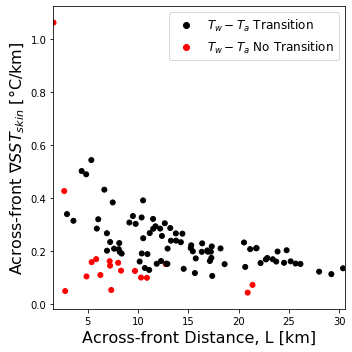

In [10]:
### Revisions paper: Fig. 7a: 2 colors only: yes-no stability sign switch

col_dict2={-2:"r",
          -1:"k",
          1:"k",
          2:"r"}

# We create a colormar from our list of colors
cm2 = ListedColormap([col_dict2[x] for x in col_dict2.keys()])

# prepare normalizer
## Prepare bins for the normalizer
norm_bins2 = np.sort([*col_dict2.keys()]) + 0.5
norm_bins2 = np.insert(norm_bins2, 0, np.min(norm_bins2) - 1.0)
## Make normalizer and formatter
norm2 = mpl.colors.BoundaryNorm(norm_bins2, len_lab, clip=True)
fmt2 = mpl.ticker.FuncFormatter(lambda x, pos: labels[norm2(x)])

diff2 = norm_bins2[1:] - norm_bins2[:-1]
tickz2 = norm_bins2[:-1] + diff2 / 2

# plot gradient vs. distance color-coded by stability switch sign

fig = plt.figure(figsize=(5,5))
fig = plt.scatter(Dist_ud_298_mod, Tgrd_ud_298_mod, c=flag_stab_298_mod,cmap=cm2,norm=norm2, marker='o', s=25)
fig = plt.scatter(Dist_ud_297, Tgrd_ud_297, c=flag_stab_297,cmap=cm2,norm=norm2, marker='o', s=25)
fig = plt.scatter(Dist_ud_296, Tgrd_ud_296, c=flag_stab_296,cmap=cm2,norm=norm2, marker='o', s=25)
fig = plt.scatter(Dist_ud_295, Tgrd_ud_295, c=flag_stab_295,cmap=cm2,norm=norm2, marker='o', s=25)
fig = plt.scatter(Dist_ud_294, Tgrd_ud_294, c=flag_stab_294,cmap=cm2,norm=norm2, marker='o', s=25)
fig = plt.scatter(Dist_ud_293, Tgrd_ud_293, c=flag_stab_293,cmap=cm2,norm=norm2, marker='o', s=25)
fig = plt.scatter(Dist_ud_292, Tgrd_ud_292, c=flag_stab_292,cmap=cm2,norm=norm2, marker='o', s=25)
fig = plt.scatter(Dist_ud_289, Tgrd_ud_289, c=flag_stab_289,cmap=cm2,norm=norm2, marker='o', s=25)
fig = plt.scatter(Dist_ud_288, Tgrd_ud_288, c=flag_stab_288,cmap=cm2,norm=norm2, marker='o', s=25)
fig = plt.scatter(Dist_ud_287, Tgrd_ud_287, c=flag_stab_287,cmap=cm2,norm=norm2, marker='o', s=25)
fig = plt.scatter(Dist_ud_284, Tgrd_ud_284, c=flag_stab_284,cmap=cm2,norm=norm2, marker='o', s=25)
fig = plt.plot([], [], 'ok', label = '$T_{w}-T_{a}$ Transition')   #trick to get the legend for double axes
fig = plt.plot([], [], 'or', label = '$T_{w}-T_{a}$ No Transition') 
fig = plt.gcf()
plt.ylabel("Across-front $∇ SST_{skin}$ [$\u00B0$C/km]",fontsize=16)
plt.xlabel("Across-front Distance, L [km]",fontsize=16)
plt.legend(fontsize = 12, loc='upper right')
plt.margins(x=0)  # no padding
plt.tight_layout()
fig_fname = '/Users/sandrac/Documents/projects/AndyJ/DT_paper/plots_paper/gradient_dist_2colors.png'
#fig.savefig(fig_fname, format='png', dpi=300)
plt.draw()
plt.show()

Overall curve:  [-0.46685919 -0.3346458 ]
curve UL:  [-0.73313251  0.5152492 ]
curve LL:  [-0.69064255 -0.14826457]


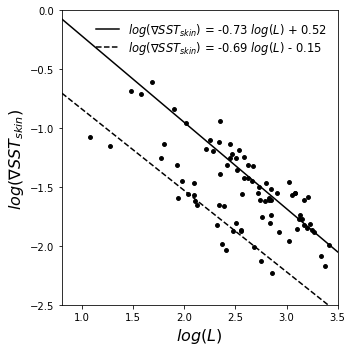

In [13]:
#paper Fig 7b

gidx = (flag_stab2 == -1) | (flag_stab2 == 1)
grad_arr_1 = grad_arr[gidx]
dist_arr_1 = dist_arr[gidx]
flag_stab_1 = flag_stab2[gidx]

grad_arr_1_log = np.log(grad_arr_1 )
dist_arr_1_log = np.log(dist_arr_1 )


xs1 = dist_arr_1_log
ys1 = grad_arr_1_log
curve_fit = np.polyfit(xs1, ys1, 1)
print('Overall curve: ',curve_fit)

## linear fit to separate the 2 curves
yfit_loglog_top = -0.8 * xs1 +0.4  

## Upper cluster
upcidx = (grad_arr_1_log > yfit_loglog_top)
flag_stab_2 = flag_stab_1[upcidx]
grad_arr_2  = grad_arr_1[upcidx]
dist_arr_2 = dist_arr_1[upcidx]
grad_arr_2_log  = grad_arr_1_log[upcidx]
dist_arr_2_log = dist_arr_1_log[upcidx]

bins_ts_log = np.arange(0.5,3.55,0.05)
xs = dist_arr_2_log
ys = grad_arr_2_log
curve_fit = np.polyfit(xs, ys, 1)
print('curve UL: ',curve_fit)
## linear fit 
#-0.73313251  0.5152492

yfit_loglog = -0.73313251  * xs + 0.5152492 # up curve
yfit_loglog_plot = -0.73313251   * bins_ts_log + 0.5152492 

text_fit_Ts_ul = '$log(∇SST_{skin})$ = -0.73 $log(L)$ + 0.52'
## lower line parallel to upper line
text_fit_Ts_ll = '$log(∇SST_{skin})$ = -0.73 $log(L)$ - 0.08'

## Lower cluster
downcidx = (grad_arr_1_log < yfit_loglog_top)
flag_stab_3 = flag_stab_1[downcidx]
grad_arr_3  = grad_arr_1[downcidx]
dist_arr_3 = dist_arr_1[downcidx]
grad_arr_3_log  = grad_arr_1_log[downcidx]
dist_arr_3_log = dist_arr_1_log[downcidx]
curve_fit_3 = np.polyfit(dist_arr_3_log, grad_arr_3_log, 1)
print('curve LL: ',curve_fit_3)
#curve LL:  [-0.69064255 -0.14826457]

yfit_loglog_LL =-0.69064255  * bins_ts_log -0.14826457 # up curve
text_fit_Ts_LL = '$log(∇SST_{skin})$ = -0.69 $log(L)$ - 0.15'


fig = plt.figure(figsize=(5,5))
fig = plt.scatter(dist_arr_1_log, grad_arr_1_log, c='k', marker='o', s=15)
plt.plot(bins_ts_log,yfit_loglog_plot,linestyle='-', c='k',label=text_fit_Ts_ul)
plt.plot(bins_ts_log,yfit_loglog_LL, linestyle='--', c='k',label=text_fit_Ts_LL)  # actual fit with bottom set
plt.ylabel("$log(∇ SST_{skin})$ ",fontsize=16)
plt.xlabel("$log(L)$",fontsize=16)
plt.margins(x=0)  
plt.legend(loc='upper right',fontsize=11.5,labelspacing=0.1, frameon=False)
plt.xlim([0.8,3.5])
plt.xlim([0.8,3.5])
plt.ylim([-2.5,0])
plt.tight_layout()
fig_fname = '/Users/sandrac/Documents/projects/AndyJ/DT_paper/plots_paper/gradient_dist_scaling_rev2.png'
#plt.savefig(fig_fname, format='png', dpi=300)
plt.draw()
plt.show()

In [18]:
#moments ALL points (2 lines) and using the 2 regimes

from scipy import stats, ndimage
from scipy.stats import binned_statistic


col_dict3={1 :"blueviolet",
           2 :"aqua",
           3 :"chartreuse"}

# We create a colormar from our list of colors
cm3 = ListedColormap([col_dict3[x] for x in col_dict3.keys()])

# Let's also define the description of each category 
#labels3 = np.array(["2 km","4 km","8 km"])
labels3 = np.array(["2","4","8"])

len_lab3 = len(labels3)

# prepare normalizer
## Prepare bins for the normalizer
norm_bins3 = np.sort([*col_dict3.keys()]) + 0.5
#norm_bins = np.sort([*col_dict.keys()]) 
norm_bins3 = np.insert(norm_bins3, 0, np.min(norm_bins3) - 1.0)
#print(norm_bins)
## Make normalizer and formatter
norm3 = mpl.colors.BoundaryNorm(norm_bins3, len_lab3, clip=True)
fmt3 = mpl.ticker.FuncFormatter(lambda x, pos: labels3[norm3(x)])

diff3 = norm_bins3[1:] - norm_bins3[:-1]
tickz3 = norm_bins3[:-1] + diff3 / 2




[-0.74762358 -1.11451385]
[-1.49398073  1.82045216]
[-2.2394478   4.76237474]
[-2.98434708  7.71157323]
[-0.76331062 -1.06450783]
[-1.52880825  1.93507283]
[-2.29576619  4.95325801]
[-3.06354662  7.98771863]
[-0.740309   -1.11363373]
[-1.47375129  1.82104201]
[-2.1996025   4.75814631]
[-2.91737535  7.69530868]


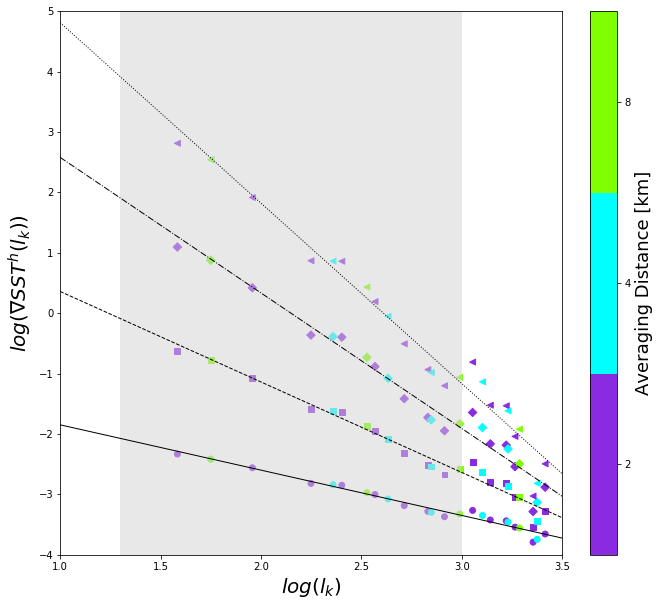

[-0.71189325 -1.19631949]
[-1.41777263  1.6458834 ]
[-2.11836732  4.48489944]
[-2.81436361  7.3218878 ]
[-0.71257191 -1.18184585]
[-1.42317328  1.6907821 ]
[-2.13106305  4.57236658]
[-2.83566514  7.46072138]
[-0.740309   -1.11363373]
[-1.47375129  1.82104201]
[-2.1996025   4.75814631]
[-2.91737535  7.69530868]
fit slopes:  [-0.71140752 -0.0128069 ]


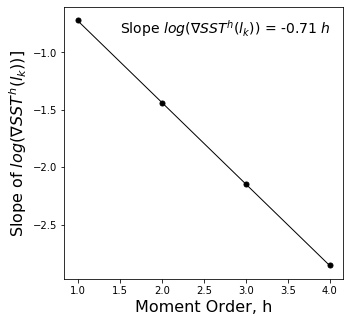

In [22]:
#moments: upper cluster only

#Paper: Fig 7c

labels3 = np.array(["2","4","8"])

l = dist_arr_2
y = grad_arr_2


bins_l_25 = np.arange(0,34,2)
bin_ctr_l_grad_25, _, _ = stats.binned_statistic(l, l, statistic='mean', bins=bins_l_25)
bin_avg_l_grad_25, _, _ = stats.binned_statistic(l, y, statistic='mean', bins=bins_l_25)
bin_std_l_grad_25, _, _ = stats.binned_statistic(l, y, statistic='std', bins=bins_l_25)

bins_l_50 = np.arange(0,36,4)
bin_ctr_l_grad_50, _, _ = stats.binned_statistic(l, l, statistic='mean', bins=bins_l_50)
bin_avg_l_grad_50, _, _ = stats.binned_statistic(l, y, statistic='mean', bins=bins_l_50)
bin_std_l_grad_50, _, _ = stats.binned_statistic(l, y, statistic='std', bins=bins_l_50)

bins_l_100 = np.arange(0,40,8)
bin_ctr_l_grad_100, _, _ = stats.binned_statistic(l, l, statistic='mean', bins=bins_l_100)
bin_avg_l_grad_100, _, _ = stats.binned_statistic(l, y, statistic='mean', bins=bins_l_100)
bin_std_l_grad_100, _, _ = stats.binned_statistic(l, y, statistic='std', bins=bins_l_100)

means = moment(y, moment=1)
stdev = np.std(y)
#variance = moment(y, moment=2)
#skewness = skew(y)
#kurt = kurtosis(y)
n_m_1 = len(y) -1
mean = (y - means)/n_m_1/stdev
variance = (y - means)**2/n_m_1/stdev**2
skewness = (y - means)**3/n_m_1/stdev**3
kurt = (y - means)**4/n_m_1/stdev**4

bin_mean_l_grad_25, _, _ = stats.binned_statistic(l, mean, statistic='mean', bins=bins_l_25)
bin_var_l_grad_25, _, _ = stats.binned_statistic(l, variance, statistic='mean', bins=bins_l_25)
bin_skew_l_grad_25, _, _ = stats.binned_statistic(l, skewness, statistic='mean', bins=bins_l_25)
bin_kurt_l_grad_25, _, _ = stats.binned_statistic(l, kurt, statistic='mean', bins=bins_l_25)

l_25_log = np.log(bin_ctr_l_grad_25)
grad_mean_25_log = np.log(bin_mean_l_grad_25)
grad_var_25_log = np.log(bin_var_l_grad_25)
grad_skew_25_log = np.log(bin_skew_l_grad_25)
grad_kurt_25_log = np.log(bin_kurt_l_grad_25)

lpf_25_log= l_25_log[~np.isnan(l_25_log)]
gpf_mean_25_log = grad_mean_25_log[~np.isnan(l_25_log)]
gpf_var_25_log = grad_var_25_log[~np.isnan(l_25_log)]
gpf_skew_25_log = grad_skew_25_log[~np.isnan(l_25_log)]
gpf_kurt_25_log = grad_kurt_25_log[~np.isnan(l_25_log)]
cidx_25_m = np.full(len(gpf_mean_25_log), 1)
cidx_25_v = np.full(len(gpf_var_25_log), 1)
cidx_25_s = np.full(len(gpf_skew_25_log), 1)
cidx_25_k = np.full(len(gpf_kurt_25_log), 1)

xl_25 = lpf_25_log
yl_1_25 = gpf_mean_25_log
yl_2_25 = gpf_var_25_log
yl_3_25 = gpf_skew_25_log
yl_4_25 = gpf_kurt_25_log
fit_1_25 = np.polyfit(xl_25, yl_1_25, 1)
print(fit_1_25)
fit_2_25 = np.polyfit(xl_25, yl_2_25, 1)
print(fit_2_25)
fit_3_25 = np.polyfit(xl_25, yl_3_25, 1)
print(fit_3_25)
fit_4_25 = np.polyfit(xl_25, yl_4_25, 1)
print(fit_4_25)

bin_mean_l_grad_50, _, _ = stats.binned_statistic(l, mean, statistic='mean', bins=bins_l_50)
bin_var_l_grad_50, _, _ = stats.binned_statistic(l, variance, statistic='mean', bins=bins_l_50)
bin_skew_l_grad_50, _, _ = stats.binned_statistic(l, skewness, statistic='mean', bins=bins_l_50)
bin_kurt_l_grad_50, _, _ = stats.binned_statistic(l, kurt, statistic='mean', bins=bins_l_50)

l_50_log = np.log(bin_ctr_l_grad_50)
grad_mean_50_log = np.log(bin_mean_l_grad_50)
grad_var_50_log = np.log(bin_var_l_grad_50)
grad_skew_50_log = np.log(bin_skew_l_grad_50)
grad_kurt_50_log = np.log(bin_kurt_l_grad_50)

lpf_50_log= l_50_log[~np.isnan(l_50_log)]
gpf_mean_50_log = grad_mean_50_log[~np.isnan(l_50_log)]
gpf_var_50_log = grad_var_50_log[~np.isnan(l_50_log)]
gpf_skew_50_log = grad_skew_50_log[~np.isnan(l_50_log)]
gpf_kurt_50_log = grad_kurt_50_log[~np.isnan(l_50_log)]
cidx_50_m = np.full(len(gpf_mean_50_log), 2)
cidx_50_v = np.full(len(gpf_var_50_log), 2)
cidx_50_s = np.full(len(gpf_skew_50_log), 2)
cidx_50_k = np.full(len(gpf_kurt_50_log), 2)

xl_50 = lpf_50_log
yl_1_50 = gpf_mean_50_log
yl_2_50 = gpf_var_50_log
yl_3_50 = gpf_skew_50_log
yl_4_50 = gpf_kurt_50_log
fit_1_50 = np.polyfit(xl_50, yl_1_50, 1)
print(fit_1_50)
fit_2_50 = np.polyfit(xl_50, yl_2_50, 1)
print(fit_2_50)
fit_3_50 = np.polyfit(xl_50, yl_3_50, 1)
print(fit_3_50)
fit_4_50 = np.polyfit(xl_50, yl_4_50, 1)
print(fit_4_50)

bin_mean_l_grad_100, _, _ = stats.binned_statistic(l, mean, statistic='mean', bins=bins_l_100)
bin_var_l_grad_100, _, _ = stats.binned_statistic(l, variance, statistic='mean', bins=bins_l_100)
bin_skew_l_grad_100, _, _ = stats.binned_statistic(l, skewness, statistic='mean', bins=bins_l_100)
bin_kurt_l_grad_100, _, _ = stats.binned_statistic(l, kurt, statistic='mean', bins=bins_l_100)

l_100_log = np.log(bin_ctr_l_grad_100)
grad_mean_100_log = np.log(bin_mean_l_grad_100)
grad_var_100_log = np.log(bin_var_l_grad_100)
grad_skew_100_log = np.log(bin_skew_l_grad_100)
grad_kurt_100_log = np.log(bin_kurt_l_grad_100)


lpf_100_log= l_100_log[~np.isnan(l_100_log)]
cidx_100 = np.full(len(lpf_100_log), 3)
gpf_mean_100_log = grad_mean_100_log[~np.isnan(l_100_log)]
gpf_var_100_log = grad_var_100_log[~np.isnan(l_100_log)]
gpf_skew_100_log = grad_skew_100_log[~np.isnan(l_100_log)]
gpf_kurt_100_log = grad_kurt_100_log[~np.isnan(l_100_log)]

cidx_100_m = np.full(len(gpf_mean_100_log), 3)
cidx_100_v = np.full(len(gpf_var_100_log), 3)
cidx_100_s = np.full(len(gpf_skew_100_log), 3)
cidx_100_k = np.full(len(gpf_kurt_100_log), 3)

xl_100 = lpf_100_log
yl_1_100 = gpf_mean_100_log
yl_2_100 = gpf_var_100_log
yl_3_100 = gpf_skew_100_log
yl_4_100 = gpf_kurt_100_log

fit_1_100 = np.polyfit(xl_100, yl_1_100, 1)
print(fit_1_100)
fit_2_100 = np.polyfit(xl_100, yl_2_100, 1)
print(fit_2_100)
fit_3_100 = np.polyfit(xl_100, yl_3_100, 1)
print(fit_3_100)
fit_4_100 = np.polyfit(xl_100, yl_4_100, 1)
print(fit_4_100)


### second/upper line
#[-0.74762358 -1.11451385]
#[-1.49398073  1.82045216]
#[-2.2394478   4.76237474]
#[-2.98434708  7.71157323]
#[-0.76331062 -1.06450783]
#[-1.52880825  1.93507283]
#[-2.29576619  4.95325801]
#[-3.06354662  7.98771863]
#[-0.740309   -1.11363373]
#[-1.47375129  1.82104201]
#[-2.1996025   4.75814631]
#[-2.91737535  7.69530868]

slp_mean = [-0.74762358, -0.76331062,-0.740309]
slp_var = [-1.49398073, -1.52880825, -1.47375129]
slp_skw = [-2.2394478,-2.29576619,-2.1996025]
slp_krt = [-2.98434708,-3.06354662,-2.91737535]

int_mean = [-1.11451385,-1.06450783,-1.11363373]
int_var = [1.82045216,1.93507283,1.82104201]
int_skw = [4.76237474,4.95325801,4.75814631]
int_krt = [7.71157323,7.98771863,7.69530868]

mean_slp_mean =np.mean(slp_mean)
mean_slp_var =np.mean(slp_var)
mean_slp_skw =np.mean(slp_skw)
mean_slp_krt =np.mean(slp_krt)

mean_int_mean =np.mean(int_mean)
mean_int_var =np.mean(int_var)
mean_int_skw =np.mean(int_skw)
mean_int_krt =np.mean(int_krt)

bins_p = np.arange(1,4,0.5)
fit_1 = mean_slp_mean* bins_p + mean_int_mean
fit_2 = mean_slp_var* bins_p + mean_int_var
fit_3 = mean_slp_skw* bins_p + mean_int_skw
fit_4 = mean_slp_krt* bins_p + mean_int_krt

data = [
    [mean_slp_mean* x + mean_int_mean for x in range(5)],
    [mean_slp_var* x + mean_int_var for x in range(5)],
    [mean_slp_skw* x + mean_int_skw for x in range(5)],
    [mean_slp_krt* x + mean_int_krt for x in range(5)]
       ]

plot_type = [
        {'marker': 'o', 'linestyle': '-', 'markerfacecolor': 'none'},
        {'marker': 's', 'linestyle': '--', 'markerfacecolor': 'none'},
        {'marker': 'D', 'linestyle': '-.', 'markerfacecolor': 'none'},
        {'marker': '<', 'linestyle': ':', 'markerfacecolor': 'none'},
    ]

fig = plt.figure(figsize = (10,10))
#fig = plt.scatter(lpf_1_log,gpf_mean_1_log,c='k', marker='s', s=35)
fig = plt.scatter(lpf_25_log,gpf_mean_25_log,c=cidx_25_m,cmap=cm3,norm=norm3, marker='o', s=35)
fig = plt.scatter(lpf_50_log,gpf_mean_50_log, c=cidx_50_m,cmap=cm3,norm=norm3,marker='o', s=35)
fig = plt.scatter(lpf_100_log,gpf_mean_100_log,c=cidx_100_m,cmap=cm3,norm=norm3,marker='o', s=35)
#fig = plt.scatter(lpf_1_log,gpf_var_1_log,c='k', marker='s', s=35)
fig = plt.scatter(lpf_25_log,gpf_var_25_log,c=cidx_25_v,cmap=cm3,norm=norm3, marker='s', s=35)
fig = plt.scatter(lpf_50_log,gpf_var_50_log,c=cidx_50_v,cmap=cm3,norm=norm3,marker='s', s=35)
fig = plt.scatter(lpf_100_log,gpf_var_100_log,c=cidx_100_v,cmap=cm3,norm=norm3, marker='s', s=35)
#fig = plt.scatter(lpf_1_log,gpf_skew_1_log,c='k', marker='D', s=35)
fig = plt.scatter(lpf_25_log,gpf_skew_25_log,c=cidx_25_s,cmap=cm3,norm=norm3, marker='D', s=35)
fig = plt.scatter(lpf_50_log,gpf_skew_50_log, c=cidx_50_s,cmap=cm3,norm=norm3,marker='D', s=35)
fig = plt.scatter(lpf_100_log,gpf_skew_100_log,c=cidx_100_s,cmap=cm3,norm=norm3, marker='D', s=35)
#fig = plt.scatter(lpf_1_log,gpf_kurt_1_log,c='k', marker='<', s=35)
fig = plt.scatter(lpf_25_log,gpf_kurt_25_log,c=cidx_25_k,cmap=cm3,norm=norm3, marker='<', s=35)
fig = plt.scatter(lpf_50_log,gpf_kurt_50_log, c=cidx_50_k,cmap=cm3,norm=norm3,marker='<', s=35)
fig = plt.scatter(lpf_100_log,gpf_kurt_100_log,c=cidx_100_k,cmap=cm3,norm=norm3, marker='<', s=35)

# Shadow Box
plt.axvspan(1.3, 3.0, facecolor='lightgray', alpha=0.5)  #shaded box
plt.plot(bins_p,fit_1,'-',linewidth=1, c='k',label='h = 1')
plt.plot(bins_p,fit_2,'--',linewidth=1,c='k',label='h = 2')
plt.plot(bins_p,fit_3,'-.',linewidth=1, c='k',label='h = 3')
plt.plot(bins_p,fit_4,':',linewidth=1,c='k',label='h = 4')
plt.ylabel('$log (∇SST^{h}(l_{k}))$', fontsize = 20)
plt.xlabel("$log(l_{k})$",fontsize=20)
plt.margins(x=0)  
plt.xlim([1.0,3.5])
plt.ylim([-4,5])
cb = plt.colorbar(fraction=0.050)
cb.set_label('Averaging Distance [km]',fontsize=18)
cb.set_ticks(ticks=tickz3)
cb.set_ticklabels(labels3)
fig_fname = '/Users/sandrac/Documents/projects/AndyJ/DT_paper/plots_paper/SMODE_selfsim_upperline_moments.png'
#plt.savefig(fig_fname, dpi=300, transparent=False, format='png', bbox_inches='tight')
plt.draw()
plt.show()
 
    
# restricting fit to 2.5 -20 km (1.5 and 3.3 for log)       
srange_25 = (lpf_25_log >=1.5) & (lpf_25_log <3.3) 
xl_25_l = lpf_25_log[srange_25]
yl_1_25_l = gpf_mean_25_log[srange_25]
yl_2_25_l = gpf_var_25_log[srange_25]
yl_3_25_l = gpf_skew_25_log[srange_25]
yl_4_25_l = gpf_kurt_25_log[srange_25]
fit_1_25_l = np.polyfit(xl_25_l, yl_1_25_l, 1)
print(fit_1_25_l)
fit_2_25_l = np.polyfit(xl_25_l, yl_2_25_l, 1)
print(fit_2_25_l)
fit_3_25_l = np.polyfit(xl_25_l, yl_3_25_l, 1)
print(fit_3_25_l)
fit_4_25_l = np.polyfit(xl_25_l, yl_4_25_l, 1)
print(fit_4_25_l)  

#fit_1_l = xl_25_l*  -0.52685797 -1.98725212

srange_50 = (lpf_50_log >=1.5) & (lpf_50_log <3.3) 
xl_50_l = lpf_50_log[srange_50]
yl_1_50_l = gpf_mean_50_log[srange_50]
yl_2_50_l = gpf_var_50_log[srange_50]
yl_3_50_l = gpf_skew_50_log[srange_50]
yl_4_50_l = gpf_kurt_50_log[srange_50]
fit_1_50_l = np.polyfit(xl_50_l, yl_1_50_l, 1)
print(fit_1_50_l)
fit_2_50_l = np.polyfit(xl_50_l, yl_2_50_l, 1)
print(fit_2_50_l)
fit_3_50_l = np.polyfit(xl_50_l, yl_3_50_l, 1)
print(fit_3_50_l)
fit_4_50_l = np.polyfit(xl_50_l, yl_4_50_l, 1)
print(fit_4_50_l)  

#fit_1_l = xl_25_l*  -0.51468062 -2.02250899

srange_100 = (lpf_100_log >=1.5) & (lpf_100_log <3.3) 
xl_100_l = lpf_100_log[srange_100]
yl_1_100_l = gpf_mean_100_log[srange_100]
yl_2_100_l = gpf_var_100_log[srange_100]
yl_3_100_l = gpf_skew_100_log[srange_100]
yl_4_100_l = gpf_kurt_100_log[srange_100]
fit_1_100_l = np.polyfit(xl_100_l, yl_1_100_l, 1)
print(fit_1_100_l)
fit_2_100_l = np.polyfit(xl_100_l, yl_2_100_l, 1)
print(fit_2_100_l)
fit_3_100_l = np.polyfit(xl_100_l, yl_3_100_l, 1)
print(fit_3_100_l)
fit_4_100_l = np.polyfit(xl_100_l, yl_4_100_l, 1)
print(fit_4_100_l)  

#[-0.71189325 -1.19631949]
#[-1.41777263  1.6458834 ]
#[-2.11836732  4.48489944]
#[-2.81436361  7.3218878 ]
#[-0.71257191 -1.18184585]
#[-1.42317328  1.6907821 ]
#[-2.13106305  4.57236658]
#[-2.83566514  7.46072138]
#[-0.740309   -1.11363373]
#[-1.47375129  1.82104201]
#[-2.1996025   4.75814631]
#[-2.91737535  7.69530868]

slp_mean_l = [-0.71189325, -0.71257191,-0.740309]
slp_var_l  = [-1.41777263, -1.42317328, -1.47375129]
slp_skw_l  = [-2.11836732,-2.13106305,-2.1996025]
slp_krt_l  = [-2.81436361,-2.83566514,-2.91737535]

mom_slp_arr_ul = [np.mean(slp_mean_l),np.mean(slp_var_l),np.mean(slp_skw_l),np.mean(slp_krt_l)]
mom_order_arr = [1,2,3,4]
fit_slp_m = np.polyfit(mom_order_arr, mom_slp_arr_ul, 1)
print('fit slopes: ',fit_slp_m)
#fit slopes:  [-0.71140752 -0.0128069 ]

xm = np.arange(1,5,1)
fit_slp_m_ul = -0.71140752* xm + -0.0128069
text_fit_slp_ul = 'Slope $log (∇SST^{h}(l_{k}))$ = -0.71 $h$'

fig = plt.figure(figsize = (5,5))
plt.text(1.5, -0.7, text_fit_slp_ul, fontsize=14,verticalalignment='top')
fig = plt.scatter(mom_order_arr,mom_slp_arr_ul,c='k', marker='o', s=25) 
plt.plot(xm,fit_slp_m_ul,c='k',linewidth=1)
plt.ylabel('Slope of $log (∇SST^{h}(l_{k}))$]', fontsize = 16)
plt.xlabel("Moment Order, h",fontsize=16)
fig_fname = '/Users/sandrac/Documents/projects/AndyJ/DT_paper/plots_paper/SMODE_selfsim_upperline_coef.png'
#plt.savefig(fig_fname, dpi=300, transparent=False, format='png', bbox_inches='tight')
plt.draw()
plt.show()


[-0.69533211 -0.53805398]
[-1.39196678  2.07013712]
[-2.09005714  4.68939683]
[-2.78965253  7.31956513]
[-0.65709155 -0.64223346]
[-1.31393956  1.86451213]
[-1.97088451  4.38442696]
[-2.62816431  6.9167747 ]
[-0.67007652 -0.60952338]
[-1.34103868  1.92387225]
[-2.01272182  4.46387419]
[-2.68493642  7.00954136]


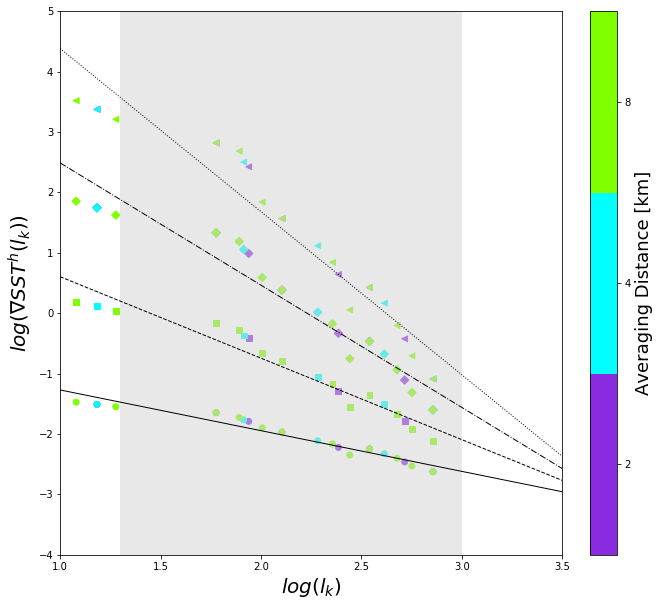

[-0.86938065 -0.11110245]
[-1.74910511  2.94621892]
[-2.63949364  6.0371976 ]
[-3.54035289  9.16107824]
[-0.87781322 -0.08640065]
[-1.78554037  3.05212186]
[-2.72177648  6.27536223]
[-3.68429051  9.57636672]
[-0.87559909 -0.10633007]
[-1.76362913  2.95855086]
[-2.6627945   6.05555887]
[-3.57160569  9.18056731]
fit slopes:  [-0.90820528  0.04206476]


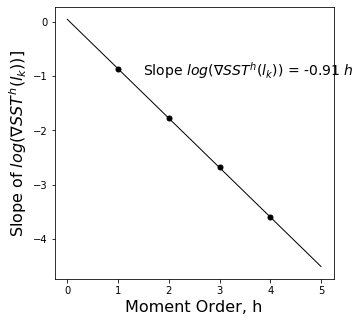

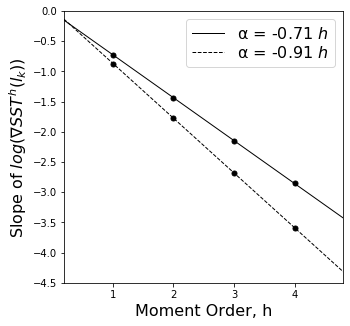

In [24]:
#moments: only lower cluster (not included in the paper)
# Paper Fig. 7d

l = dist_arr_3
y = grad_arr_3

bins_l_25 = np.arange(0,34,2)
bin_ctr_l_grad_25, _, _ = stats.binned_statistic(l, l, statistic='mean', bins=bins_l_25)
bin_avg_l_grad_25, _, _ = stats.binned_statistic(l, y, statistic='mean', bins=bins_l_25)
bin_std_l_grad_25, _, _ = stats.binned_statistic(l, y, statistic='std', bins=bins_l_25)

bins_l_50 = np.arange(0,36,4)
bin_ctr_l_grad_50, _, _ = stats.binned_statistic(l, l, statistic='mean', bins=bins_l_50)
bin_avg_l_grad_50, _, _ = stats.binned_statistic(l, y, statistic='mean', bins=bins_l_50)
bin_std_l_grad_50, _, _ = stats.binned_statistic(l, y, statistic='std', bins=bins_l_50)

bins_l_100 = np.arange(0,40,1)
bin_ctr_l_grad_100, _, _ = stats.binned_statistic(l, l, statistic='mean', bins=bins_l_100)
bin_avg_l_grad_100, _, _ = stats.binned_statistic(l, y, statistic='mean', bins=bins_l_100)
bin_std_l_grad_100, _, _ = stats.binned_statistic(l, y, statistic='std', bins=bins_l_100)

means = moment(y, moment=1)
stdev = np.std(y)
n_m_1 = len(y) -1
mean = (y - means)/n_m_1/stdev
variance = (y - means)**2/n_m_1/stdev**2
skewness = (y - means)**3/n_m_1/stdev**3
kurt = (y - means)**4/n_m_1/stdev**4

bin_mean_l_grad_25, _, _ = stats.binned_statistic(l, mean, statistic='mean', bins=bins_l_25)
bin_var_l_grad_25, _, _ = stats.binned_statistic(l, variance, statistic='mean', bins=bins_l_25)
bin_skew_l_grad_25, _, _ = stats.binned_statistic(l, skewness, statistic='mean', bins=bins_l_25)
bin_kurt_l_grad_25, _, _ = stats.binned_statistic(l, kurt, statistic='mean', bins=bins_l_25)

l_25_log = np.log(bin_ctr_l_grad_25)
grad_mean_25_log = np.log(bin_mean_l_grad_25)
grad_var_25_log = np.log(bin_var_l_grad_25)
grad_skew_25_log = np.log(bin_skew_l_grad_25)
grad_kurt_25_log = np.log(bin_kurt_l_grad_25)

lpf_25_log= l_25_log[~np.isnan(l_25_log)]
gpf_mean_25_log = grad_mean_25_log[~np.isnan(l_25_log)]
gpf_var_25_log = grad_var_25_log[~np.isnan(l_25_log)]
gpf_skew_25_log = grad_skew_25_log[~np.isnan(l_25_log)]
gpf_kurt_25_log = grad_kurt_25_log[~np.isnan(l_25_log)]
cidx_25_m = np.full(len(gpf_mean_25_log), 1)
cidx_25_v = np.full(len(gpf_var_25_log), 1)
cidx_25_s = np.full(len(gpf_skew_25_log), 1)
cidx_25_k = np.full(len(gpf_kurt_25_log), 1)

xl_25 = lpf_25_log
yl_1_25 = gpf_mean_25_log
yl_2_25 = gpf_var_25_log
yl_3_25 = gpf_skew_25_log
yl_4_25 = gpf_kurt_25_log
fit_1_25 = np.polyfit(xl_25, yl_1_25, 1)
print(fit_1_25)
fit_2_25 = np.polyfit(xl_25, yl_2_25, 1)
print(fit_2_25)
fit_3_25 = np.polyfit(xl_25, yl_3_25, 1)
print(fit_3_25)
fit_4_25 = np.polyfit(xl_25, yl_4_25, 1)
print(fit_4_25)

bin_mean_l_grad_50, _, _ = stats.binned_statistic(l, mean, statistic='mean', bins=bins_l_50)
bin_var_l_grad_50, _, _ = stats.binned_statistic(l, variance, statistic='mean', bins=bins_l_50)
bin_skew_l_grad_50, _, _ = stats.binned_statistic(l, skewness, statistic='mean', bins=bins_l_50)
bin_kurt_l_grad_50, _, _ = stats.binned_statistic(l, kurt, statistic='mean', bins=bins_l_50)

l_50_log = np.log(bin_ctr_l_grad_50)
grad_mean_50_log = np.log(bin_mean_l_grad_50)
grad_var_50_log = np.log(bin_var_l_grad_50)
grad_skew_50_log = np.log(bin_skew_l_grad_50)
grad_kurt_50_log = np.log(bin_kurt_l_grad_50)

lpf_50_log= l_50_log[~np.isnan(l_50_log)]
gpf_mean_50_log = grad_mean_50_log[~np.isnan(l_50_log)]
gpf_var_50_log = grad_var_50_log[~np.isnan(l_50_log)]
gpf_skew_50_log = grad_skew_50_log[~np.isnan(l_50_log)]
gpf_kurt_50_log = grad_kurt_50_log[~np.isnan(l_50_log)]
cidx_50_m = np.full(len(gpf_mean_50_log), 2)
cidx_50_v = np.full(len(gpf_var_50_log), 2)
cidx_50_s = np.full(len(gpf_skew_50_log), 2)
cidx_50_k = np.full(len(gpf_kurt_50_log), 2)

xl_50 = lpf_50_log
yl_1_50 = gpf_mean_50_log
yl_2_50 = gpf_var_50_log
yl_3_50 = gpf_skew_50_log
yl_4_50 = gpf_kurt_50_log
fit_1_50 = np.polyfit(xl_50, yl_1_50, 1)
print(fit_1_50)
fit_2_50 = np.polyfit(xl_50, yl_2_50, 1)
print(fit_2_50)
fit_3_50 = np.polyfit(xl_50, yl_3_50, 1)
print(fit_3_50)
fit_4_50 = np.polyfit(xl_50, yl_4_50, 1)
print(fit_4_50)

bin_mean_l_grad_100, _, _ = stats.binned_statistic(l, mean, statistic='mean', bins=bins_l_100)
bin_var_l_grad_100, _, _ = stats.binned_statistic(l, variance, statistic='mean', bins=bins_l_100)
bin_skew_l_grad_100, _, _ = stats.binned_statistic(l, skewness, statistic='mean', bins=bins_l_100)
bin_kurt_l_grad_100, _, _ = stats.binned_statistic(l, kurt, statistic='mean', bins=bins_l_100)

l_100_log = np.log(bin_ctr_l_grad_100)
grad_mean_100_log = np.log(bin_mean_l_grad_100)
grad_var_100_log = np.log(bin_var_l_grad_100)
grad_skew_100_log = np.log(bin_skew_l_grad_100)
grad_kurt_100_log = np.log(bin_kurt_l_grad_100)

lpf_100_log= l_100_log[~np.isnan(l_100_log)]
gpf_mean_100_log = grad_mean_100_log[~np.isnan(l_100_log)]
gpf_var_100_log = grad_var_100_log[~np.isnan(l_100_log)]
gpf_skew_100_log = grad_skew_100_log[~np.isnan(l_100_log)]
gpf_kurt_100_log = grad_kurt_100_log[~np.isnan(l_100_log)]

cidx_100_m = np.full(len(gpf_mean_100_log), 3)
cidx_100_v = np.full(len(gpf_var_100_log), 3)
cidx_100_s = np.full(len(gpf_skew_100_log), 3)
cidx_100_k = np.full(len(gpf_kurt_100_log), 3)


xl_100 = lpf_100_log
yl_1_100 = gpf_mean_100_log
yl_2_100 = gpf_var_100_log
yl_3_100 = gpf_skew_100_log
yl_4_100 = gpf_kurt_100_log

fit_1_100 = np.polyfit(xl_100, yl_1_100, 1)
print(fit_1_100)
fit_2_100 = np.polyfit(xl_100, yl_2_100, 1)
print(fit_2_100)
fit_3_100 = np.polyfit(xl_100, yl_3_100, 1)
print(fit_3_100)
fit_4_100 = np.polyfit(xl_100, yl_4_100, 1)
print(fit_4_100)

### lower line
#[-0.69533211 -0.53805398]
#[-1.39196678  2.07013712]
#[-2.09005714  4.68939683]
#[-2.78965253  7.31956513]
#[-0.65709155 -0.64223346]
#[-1.31393956  1.86451213]
#[-1.97088451  4.38442696]
#[-2.62816431  6.9167747 ]
## 1 km
#[-0.67007652 -0.60952338]
#[-1.34103868  1.92387225]
#[-2.01272182  4.46387419]
#[-2.68493642  7.00954136]
## 8 km
##[-0.85286827 -0.16589005]
##[-1.73296096  2.8896286 ]
##[-2.63700683  6.02167396]
##[-3.56133751  9.21947347]


## 2 and 4
slp_mean = [-0.69533211, -0.65709155,-0.67007652]
slp_var = [-1.39196678, -1.31393956,-1.34103868]
slp_skw = [-2.09005714,-1.97088451,-2.01272182]
slp_krt = [-2.78965253,-2.62816431,-2.68493642]

int_mean = [-0.53805398,-0.64223346,-0.60952338]
int_var = [2.07013712,1.86451213,1.92387225]
int_skw = [4.68939683,4.38442696,4.46387419]
int_krt = [7.31956513,6.9167747,7.00954136]

mean_slp_mean =np.mean(slp_mean)
mean_slp_var =np.mean(slp_var)
mean_slp_skw =np.mean(slp_skw)
mean_slp_krt =np.mean(slp_krt)

mean_int_mean =np.mean(int_mean)
mean_int_var =np.mean(int_var)
mean_int_skw =np.mean(int_skw)
mean_int_krt =np.mean(int_krt)

bins_p = np.arange(1,4,0.5)
fit_1 = mean_slp_mean* bins_p + mean_int_mean
fit_2 = mean_slp_var* bins_p + mean_int_var
fit_3 = mean_slp_skw* bins_p + mean_int_skw
fit_4 = mean_slp_krt* bins_p + mean_int_krt

data = [
    [mean_slp_mean* x + mean_int_mean for x in range(5)],
    [mean_slp_var* x + mean_int_var for x in range(5)],
    [mean_slp_skw* x + mean_int_skw for x in range(5)],
    [mean_slp_krt* x + mean_int_krt for x in range(5)]
       ]

plot_type = [
        {'marker': 'o', 'linestyle': '-', 'markerfacecolor': 'none'},
        {'marker': 's', 'linestyle': '--', 'markerfacecolor': 'none'},
        {'marker': 'D', 'linestyle': '-.', 'markerfacecolor': 'none'},
        {'marker': '<', 'linestyle': ':', 'markerfacecolor': 'none'},
    ]

fig = plt.figure(figsize = (10,10))
fig = plt.scatter(lpf_25_log,gpf_mean_25_log,c=cidx_25_m,cmap=cm3,norm=norm3, marker='o', s=35)
fig = plt.scatter(lpf_50_log,gpf_mean_50_log, c=cidx_50_m,cmap=cm3,norm=norm3,marker='o', s=35)
fig = plt.scatter(lpf_100_log,gpf_mean_100_log,c=cidx_100_m,cmap=cm3,norm=norm3,marker='o', s=35)
fig = plt.scatter(lpf_25_log,gpf_var_25_log,c=cidx_25_v,cmap=cm3,norm=norm3, marker='s', s=35)
fig = plt.scatter(lpf_50_log,gpf_var_50_log,c=cidx_50_v,cmap=cm3,norm=norm3,marker='s', s=35)
fig = plt.scatter(lpf_100_log,gpf_var_100_log,c=cidx_100_v,cmap=cm3,norm=norm3, marker='s', s=35)
fig = plt.scatter(lpf_25_log,gpf_skew_25_log,c=cidx_25_s,cmap=cm3,norm=norm3, marker='D', s=35)
fig = plt.scatter(lpf_50_log,gpf_skew_50_log, c=cidx_50_s,cmap=cm3,norm=norm3,marker='D', s=35)
fig = plt.scatter(lpf_100_log,gpf_skew_100_log,c=cidx_100_s,cmap=cm3,norm=norm3, marker='D', s=35)
fig = plt.scatter(lpf_25_log,gpf_kurt_25_log,c=cidx_25_k,cmap=cm3,norm=norm3, marker='<', s=35)
fig = plt.scatter(lpf_50_log,gpf_kurt_50_log, c=cidx_50_k,cmap=cm3,norm=norm3,marker='<', s=35)
fig = plt.scatter(lpf_100_log,gpf_kurt_100_log,c=cidx_100_k,cmap=cm3,norm=norm3, marker='<', s=35)

# Shadow Box
#plt.axvspan(1.5, 3.0, facecolor='lightgray', alpha=0.5)  #shaded box
plt.axvspan(1.3, 3.0, facecolor='lightgray', alpha=0.5)  #shaded box
plt.plot(bins_p,fit_1,'-',linewidth=1, c='k',label='h = 1')
plt.plot(bins_p,fit_2,'--',linewidth=1,c='k',label='h = 2')
plt.plot(bins_p,fit_3,'-.',linewidth=1, c='k',label='h = 3')
plt.plot(bins_p,fit_4,':',linewidth=1,c='k',label='h = 4')
plt.ylabel('$log (∇SST^{h}(l_{k}))$', fontsize = 20)
plt.xlabel("$log(l_{k})$",fontsize=20)
plt.margins(x=0)  # no padding
plt.xlim([1.0,3.5])
plt.ylim([-4,5])
cb = plt.colorbar(fraction=0.050)
cb.set_label('Averaging Distance [km]',fontsize=18)
cb.set_ticks(ticks=tickz3)
cb.set_ticklabels(labels3)
fig_fname = '/Users/sandrac/Documents/projects/AndyJ/DT_paper/plots_paper/SMODE_selfsim_upperline_moments.png'
#plt.savefig(fig_fname, dpi=300, transparent=False, format='png', bbox_inches='tight')
plt.draw()
plt.show()
 
# restricting fit to 2.5 -20 km (1.5 and 3.3 for log)    
    
srange_25 = (lpf_25_log >=1.5) & (lpf_25_log <3.3)
#srange_25 = (lpf_25_log >=1.5) & (lpf_25_log <=3) 
#srange_25 = (lpf_25_log >=2.0) & (lpf_25_log <2.8) 
xl_25_l = lpf_25_log[srange_25]
yl_1_25_l = gpf_mean_25_log[srange_25]
yl_2_25_l = gpf_var_25_log[srange_25]
yl_3_25_l = gpf_skew_25_log[srange_25]
yl_4_25_l = gpf_kurt_25_log[srange_25]
fit_1_25_l = np.polyfit(xl_25_l, yl_1_25_l, 1)
print(fit_1_25_l)
fit_2_25_l = np.polyfit(xl_25_l, yl_2_25_l, 1)
print(fit_2_25_l)
fit_3_25_l = np.polyfit(xl_25_l, yl_3_25_l, 1)
print(fit_3_25_l)
fit_4_25_l = np.polyfit(xl_25_l, yl_4_25_l, 1)
print(fit_4_25_l)  


#fit_1_l = xl_25_l*  -0.52685797 -1.98725212

srange_50 = (lpf_50_log >=1.5) & (lpf_50_log <3.3) 
#srange_50 = (lpf_50_log >=2.) & (lpf_50_log <2.8) 
xl_50_l = lpf_50_log[srange_50]
yl_1_50_l = gpf_mean_50_log[srange_50]
yl_2_50_l = gpf_var_50_log[srange_50]
yl_3_50_l = gpf_skew_50_log[srange_50]
yl_4_50_l = gpf_kurt_50_log[srange_50]
fit_1_50_l = np.polyfit(xl_50_l, yl_1_50_l, 1)
print(fit_1_50_l)
fit_2_50_l = np.polyfit(xl_50_l, yl_2_50_l, 1)
print(fit_2_50_l)
fit_3_50_l = np.polyfit(xl_50_l, yl_3_50_l, 1)
print(fit_3_50_l)
fit_4_50_l = np.polyfit(xl_50_l, yl_4_50_l, 1)
print(fit_4_50_l)  

#fit_1_l = xl_25_l*  -0.51468062 -2.02250899

srange_100 = (lpf_100_log >=1.5) & (lpf_100_log <3.3) 
xl_100_l = lpf_100_log[srange_100]
yl_1_100_l = gpf_mean_100_log[srange_100]
yl_2_100_l = gpf_var_100_log[srange_100]
yl_3_100_l = gpf_skew_100_log[srange_100]
yl_4_100_l = gpf_kurt_100_log[srange_100]
fit_1_100_l = np.polyfit(xl_100_l, yl_1_100_l, 1)
print(fit_1_100_l)
fit_2_100_l = np.polyfit(xl_100_l, yl_2_100_l, 1)
print(fit_2_100_l)
fit_3_100_l = np.polyfit(xl_100_l, yl_3_100_l, 1)
print(fit_3_100_l)
fit_4_100_l = np.polyfit(xl_100_l, yl_4_100_l, 1)
print(fit_4_100_l)  

## Lower line
#[-0.86938065 -0.11110245]
#[-1.74910511  2.94621892]
#[-2.63949364  6.0371976 ]
#[-3.54035289  9.16107824]
#[-0.87781322 -0.08640065]
#[-1.78554037  3.05212186]
#[-2.72177648  6.27536223]
#[-3.68429051  9.57636672]
#[-0.87559909 -0.10633007]
#[-1.76362913  2.95855086]
#[-2.6627945   6.05555887]
#[-3.57160569  9.18056731]

slp_mean_l = [-0.86938065, -0.87781322,-0.87559909]
slp_var_l  = [-1.74910511, -1.78554037, -1.76362913]
slp_skw_l  = [-2.63949364,-2.72177648,-2.6627945]
slp_krt_l  = [-3.54035289,-3.68429051,-3.57160569]

mom_slp_arr_ll = [np.mean(slp_mean_l),np.mean(slp_var_l),np.mean(slp_skw_l),np.mean(slp_krt_l)]
mom_order_arr = [1,2,3,4]
fit_slp_m_ll = np.polyfit(mom_order_arr, mom_slp_arr_ll, 1)
print('fit slopes: ',fit_slp_m_ll)
#fit slopes ll:[-0.90820528  0.04206476]
#fit slopes ul:  [-0.71140752 -0.0128069 ]

xm = np.arange(0,6,1)
fit_slp_m_ll = -0.90820528* xm + 0.04206476
fit_slp_m_ul = -0.71140752* xm + -0.0128069

text_fit_slp_ll = 'Slope $log (∇SST^{h}(l_{k}))$ = -0.91 $h$'

fig = plt.figure(figsize = (5,5))
plt.text(1.5, -0.7, text_fit_slp_ll, fontsize=14,verticalalignment='top')
fig = plt.scatter(mom_order_arr,mom_slp_arr_ll,c='k', marker='o', s=25) 
plt.plot(xm,fit_slp_m_ll,c='k',linewidth=1)
plt.ylabel('Slope of $log (∇SST^{h}(l_{k}))$]', fontsize = 16)
plt.xlabel("Moment Order, h",fontsize=16)
fig_fname = '/Users/sandrac/Documents/projects/AndyJ/DT_paper/plots_paper/SMODE_selfsim_lowerline_coef.png'
#plt.savefig(fig_fname, dpi=300, transparent=False, format='png', bbox_inches='tight')
plt.draw()
plt.show()


fig = plt.figure(figsize = (5,5))
fig = plt.scatter(mom_order_arr,mom_slp_arr_ul,c='k', marker='o', s=25) 
fig = plt.scatter(mom_order_arr,mom_slp_arr_ll,c='k', marker='o', s=25) 
plt.plot(xm,fit_slp_m_ul,linestyle='-',c='k',linewidth=1, label='α = -0.71 $h$')
plt.plot(xm,fit_slp_m_ll,linestyle='--',c='k',linewidth=1, label='α = -0.91 $h$')
plt.ylabel('Slope of $log (∇SST^{h}(l_{k}))$', fontsize = 16)
plt.xlabel("Moment Order, h",fontsize=16)
plt.legend(loc='upper right',fontsize=16,labelspacing=0.2)
plt.xlim([0.2,4.8])
plt.ylim([-4.5,0])
plt.margins(x=0)  # no padding
fig_fname = '/Users/sandrac/Documents/projects/AndyJ/DT_paper/plots_paper/SMODE_selfsim_uplwline_coefs.png'
#plt.savefig(fig_fname, dpi=300, transparent=False, format='png', bbox_inches='tight')
plt.draw()
plt.show()
